<a href="https://colab.research.google.com/github/bb88dd/hello-world/blob/master/Copy_of_Ben_Daly_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
card_freq = card_freq(df, no_cards=10)
card_freq

,cards,freq
0,926,2933
1,231,2335
2,206,2084
3,507,2037
4,465,1761
5,941,1515
6,479,1514
7,552,1496
8,493,1398
9,909,1383


In [0]:
import requests
import json
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt

https://stackoverflow.com/questions/50839737/pandas-column-expansion-of-list-of-dictionary-how-to-optimise

https://stackoverflow.com/questions/48707117/count-of-elements-in-lists-within-pandas-data-farme


- Six gods (war, nature, magic, light, deception and death)
- Each god has unique powers. Choose one power for your god at start of game.
- Each god has a unique set of 30 cards (can have max. 2 of each card)
- All decks have access to a shared pool of cards known as neutral cards.
- Mana is a resource required to play cards or god powers. It's refreshed at start of turn.
- Mana required to play card shown top left corner of card.
- Underlying stats for a class of card.


#Viewing all decks used by the highest win-rate players
###This allows us to view what the best players are experimenting with.


In [0]:

def highest_win_rate_players(no_players, min_player_wins=50, records=1000, min_win_rate=0):
  URL = 'https://api.godsunchained.com/v0/properties?sort=won_matches&order=desc&perPage='
  response_properties = requests.get(URL + str(records))
  dict_properties = json.loads(response_properties.text)['records']  # Select records from dict. output.
  df_properties = pd.DataFrame(dict_properties)
  df_properties = df_properties[df_properties.won_matches >= min_player_wins]
  # Add total_matches and win_rate columns.
  df_properties['total_matches'] = df_properties.won_matches + df_properties.lost_matches
  df_properties['win_rate'] = df_properties.won_matches / df_properties.total_matches
  df_properties = df_properties[df_properties.win_rate >= min_win_rate]
  df_properties = df_properties.sort_values(by='win_rate', ascending=False)
  df_properties = df_properties.reset_index(drop=True)
  user_ids = df_properties.iloc[0:no_players, 2]
  usernames = df_properties.iloc[0:no_players, 3]
  return df_properties, user_ids, usernames

In [0]:
df_properties, user_ids, usernames = highest_win_rate_players(no_players=10, min_player_wins=100, min_win_rate=0.5)
user_ids

0     8417
1     2174
2    19891
3      205
4     5292
5    10527
6    20723
7     6500
8      456
9     9957
Name: user_id, dtype: int64

In [0]:
def decks_by_user_id(user_ids, records=150000):
  URL = 'https://api.godsunchained.com/v0/match?perPage='
  response_match = requests.get(URL + str(records))
  dict_match = json.loads(response_match.text)['records']
  df_match = json_normalize(dict_match, 'player_info')
  df_match = df_match[df_match.user_id.isin(user_ids)]
  df_match = df_match.reset_index(drop=True)
  return df_match



In [0]:
df = decks_by_user_id(user_ids, records=50000)
df

,cards,global,god,god_power,health,status,user_id
0,"[391, 976, 518, 978, 493, 526, 570, 454, 926, ...",False,nature,NaN,24,connected,8417
1,"[518, 978, 526, 454, 457, 470, 509, 941, 928, ...",False,nature,NaN,30,connected,8417
2,"[518, 978, 526, 454, 457, 470, 509, 941, 928, ...",False,nature,NaN,30,connected,8417
3,"[518, 978, 526, 454, 457, 470, 509, 941, 928, ...",False,nature,NaN,28,connected,8417
4,"[391, 976, 518, 978, 493, 526, 570, 454, 926, ...",False,nature,NaN,30,connected,8417
5,"[391, 976, 518, 978, 493, 526, 570, 454, 926, ...",False,nature,NaN,30,connected,8417
6,"[391, 976, 518, 978, 493, 526, 570, 454, 926, ...",False,nature,NaN,30,connected,8417
7,"[391, 976, 518, 978, 493, 526, 570, 454, 926, ...",False,nature,NaN,30,connected,8417
8,"[231, 307, 248, 213, 35, 206, 206, 296, 248, 3...",False,war,NaN,28,connected,5292
9,"[391, 976, 518, 978, 493, 526, 570, 454, 926, ...",False,nature,NaN,30,connected,8417


In [0]:
def gods_count(df):
  count = df['god'].value_counts()
  return count

In [0]:
gods_count = gods_count(df)
gods_count

war          801
nature       514
light        362
magic        299
death        204
deception    107
Name: god, dtype: int64

In [0]:
def plot_gods(series,
              title='Decks used by highest win rate players'):
  plt.clf()
  ax = sns.barplot(x=series.index.values, y=series)
  ax.set(ylabel='No. times used',
         title=title)
  plt.show()
  return ax

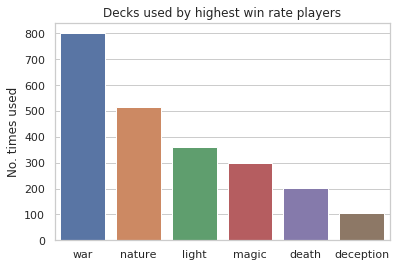

In [0]:
plot = plot_gods(gods_count)


In [0]:
def card_freq(df, no_cards):
  cards_flat = pd.Series([item for sublist in df.cards for item in sublist])
  cards_count = cards_flat.value_counts().sort_index().rename_axis('cards').reset_index(name='freq').sort_values(by='freq', ascending=False)
  cards_count = cards_count.reset_index(drop=True)
  cards_count = cards_count.iloc[0:no_cards, :]
  return cards_count

In [0]:
df_count = card_freq(df, no_cards=5)
df_count

,cards,freq
0,206,1997
1,507,1891
2,231,1684
3,926,1581
4,465,1431


In [0]:
def plot_card_freq(df,
                   title='Most included cards across all decks with win rate > 50%'):
  plt.clf()
  ax = sns.barplot(x=df.cards, y=df.freq)
  ax.set(xlabel='Card number',
         ylabel='No. times included',
         title=title)
  plt.show()
  return ax

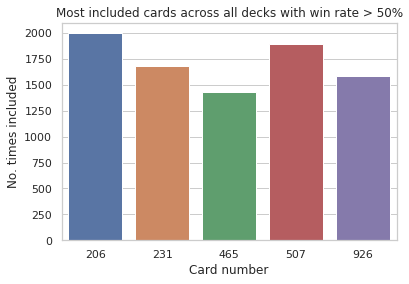

In [0]:
plot_wr_50 = plot_card_freq(df_count)

In [0]:
def decks_used_by_user_id(records=150000):
  URL = 'https://api.godsunchained.com/v0/match?perPage='
  response_match = requests.get(URL + str(records))
  dict_match = json.loads(response_match.text)
  dict_match = dict_match['records']  # Select records from dict.
  df_match = pd.DataFrame(dict_match)
  df_match = df_match.iloc[:, 3:6]
  return df_match
  

In [0]:
df_match = decks_used_by_user_id(records=5)
df_match

#df = json_normalize(df_match, 'player_info')
#df

,player_info,player_lost,player_won
0,"[{'god': 'nature', 'cards': [301, 121, 68, 237...",6008,9127
1,"[{'god': 'war', 'cards': [213, 15, 54, 19, 307...",1860,3112
2,"[{'god': 'war', 'cards': [248, 213, 206, 211, ...",6572,598
3,"[{'god': 'war', 'cards': [994, 492, 442, 231, ...",9837,3652
4,"[{'god': 'nature', 'cards': [266, 270, 262, 21...",1371,2089


In [0]:


records=5
URL = 'https://api.godsunchained.com/v0/match?perPage='
response_match = requests.get(URL + str(records))
dict_match = json.loads(response_match.text)['records']

dict_match

df = json_normalize(dict_match, 'player_info')

#df = json_normalize(df.iloc[:, 3].to_dict())

df


,cards,global,god,health,status,user_id
0,"[301, 121, 68, 237, 976, 1000, 973, 523, 910, ...",False,nature,30,connected,9127
1,"[401, 401, 404, 404, 908, 908, 455, 455, 535, ...",True,magic,0,connected,6008
2,"[213, 15, 54, 19, 307, 144, 81, 233, 213, 337,...",False,war,24,connected,3112
3,"[354, 63, 367, 493, 391, 521, 905, 519, 588, 5...",False,nature,14,connected,1860
4,"[248, 213, 206, 211, 227, 296, 137, 144, 189, ...",False,war,27,connected,598
5,"[479, 492, 500, 549, 995, 513, 510, 455, 907, ...",False,war,0,connected,6572
6,"[994, 492, 442, 231, 213, 303, 994, 536, 455, ...",False,war,21,connected,3652
7,"[385, 455, 509, 454, 507, 476, 410, 407, 402, ...",False,magic,0,connected,9837
8,"[266, 270, 262, 217, 270, 301, 108, 108, 266, ...",False,nature,11,connected,2089
9,"[57, 194, 325, 45, 249, 1000, 391, 471, 910, 5...",False,nature,0,connected,1371


In [0]:
j = [{'description': 'Total number 1', 'id': 'a', 'name': 'impressions', 'period': 'day', 'title': 'Impressions', 'values': [{'end_time': '2018-06-12T07:00:00+0000', 'value': 17686}, {'end_time': '2018-06-13T07:00:00+0000', 'value': 4064}]},
      {'description': 'fn', 'id': 'b', 'name': 'impressions', 'period': 'day', 'title': 'Impressions', 'values': [{'end_time': '2018-06-12T07:00:00+0000', 'value': 17686}, {'end_time': '2018-06-13T07:00:00+0000', 'value': 4064}]}]

from pandas.io.json import json_normalize

df = json_normalize(j, 'values')
print (df)

                   end_time  value
0  2018-06-12T07:00:00+0000  17686
1  2018-06-13T07:00:00+0000   4064
2  2018-06-12T07:00:00+0000  17686
3  2018-06-13T07:00:00+0000   4064


In [0]:
df_champs = df_match[(df_match.player_lost.isin(user_ids)) | (df_match.player_won.isin(user_ids))]
df_champs

,player_info,player_lost,player_won
355,"[{'god': 'nature', 'cards': [391, 976, 518, 97...",9837,8417
366,"[{'god': 'nature', 'cards': [518, 978, 526, 45...",3102,8417
395,"[{'god': 'nature', 'cards': [518, 978, 526, 45...",4155,8417
399,"[{'god': 'nature', 'cards': [518, 978, 526, 45...",4517,8417
402,"[{'god': 'nature', 'cards': [391, 976, 518, 97...",4697,8417
410,"[{'god': 'nature', 'cards': [391, 976, 518, 97...",3228,8417
435,"[{'god': 'nature', 'cards': [391, 976, 518, 97...",7206,8417
446,"[{'god': 'nature', 'cards': [391, 976, 518, 97...",2228,8417
596,"[{'god': 'war', 'cards': [231, 307, 248, 213, ...",10122,5292
598,"[{'god': 'nature', 'cards': [391, 976, 518, 97...",5292,8417


In [0]:
gods = df_champs.iloc[0,0]
god1 = gods[0]['god']
god2 = gods[1]['god']
print(god1, god2)

nature magic


In [0]:
for elem in gods:
  print(elem['god'])

nature
magic


In [0]:
for row in df_champs:
  

In [0]:

df1 = df_champs.iloc[0,0]
df_a = pd.DataFrame(df1)
df_a

,cards,global,god,health,status,user_id
0,"[391, 976, 518, 978, 493, 526, 570, 454, 926, ...",False,nature,24,connected,8417
1,"[456, 507, 906, 926, 476, 410, 407, 402, 1002,...",False,magic,0,connected,9837


In [0]:
df2 = df_champs.iloc[1,0]
df_b = pd.DataFrame(df2)
df_b

,cards,global,god,health,status,user_id
0,"[518, 978, 526, 454, 457, 470, 509, 941, 928, ...",False,nature,30,connected,8417
1,"[258, 109, 9, 68, 298, 222, 213, 219, 264, 197...",False,war,0,connected,3102


In [0]:
df = pd.concat([df_a, df_b])
df

,cards,global,god,health,status,user_id
0,"[391, 976, 518, 978, 493, 526, 570, 454, 926, ...",False,nature,24,connected,8417
1,"[456, 507, 906, 926, 476, 410, 407, 402, 1002,...",False,magic,0,connected,9837
0,"[518, 978, 526, 454, 457, 470, 509, 941, 928, ...",False,nature,30,connected,8417
1,"[258, 109, 9, 68, 298, 222, 213, 219, 264, 197...",False,war,0,connected,3102


In [0]:
fields = [{'name':'count', 'label':'Count'},{'name':'type', 'label':'Type'}]
[f['name'] for f in fields]
fields

[{'label': 'Count', 'name': 'count'}, {'label': 'Type', 'name': 'type'}]

In [0]:
response = requests.get('https://api.godsunchained.com/v0/user/0x4b90f1b1af8bf85577e1a2e2c170e38971711eff/inventory')
data = json.loads(response.text)
#data

records = data['records']
a = records[0:6]
a[0:6]

import pandas as pd
df = pd.DataFrame(a)
df

,attack,effect,god,health,id,mana,name,opened,proto,purity,rarity,set,tribe,type,user
0,"{'Int64': 4, 'Valid': True}",<strong>Confused</strong>. Pick one: Gain atta...,nature,"{'Int64': 0, 'Valid': False}","{'Int64': 360, 'Valid': True}",6,Black Rhino,True,360,565,common,"{'String': 'genesis', 'Valid': True}","{'String': '', 'Valid': False}",creature,0x4b90f1b1af8bf85577e1a2e2c170e38971711eff
1,"{'Int64': 1, 'Valid': True}","At the end of each turn, heal 2 to a random fr...",light,"{'Int64': 0, 'Valid': False}","{'Int64': 220, 'Valid': True}",1,Field Nurse,True,220,775,common,"{'String': 'genesis', 'Valid': True}","{'String': '', 'Valid': False}",creature,0x4b90f1b1af8bf85577e1a2e2c170e38971711eff
2,"{'Int64': 0, 'Valid': False}",Move the card with the lowest mana cost from y...,deception,"{'Int64': 0, 'Valid': False}","{'Int64': 65, 'Valid': True}",4,Pickpocket,True,65,958,common,"{'String': 'genesis', 'Valid': True}","{'String': '', 'Valid': False}",spell,0x4b90f1b1af8bf85577e1a2e2c170e38971711eff
3,"{'Int64': 0, 'Valid': False}",A random player shuffles their entire hand int...,deception,"{'Int64': 0, 'Valid': False}","{'Int64': 332, 'Valid': True}",2,Heads or Tails,True,332,78,common,"{'String': 'genesis', 'Valid': True}","{'String': '', 'Valid': False}",spell,0x4b90f1b1af8bf85577e1a2e2c170e38971711eff
4,"{'Int64': 4, 'Valid': True}",<strong>Burn</strong> 1. <strong>Roar:</strong...,neutral,"{'Int64': 0, 'Valid': False}","{'Int64': 55, 'Valid': True}",4,Boost Walker,True,55,354,epic,"{'String': 'genesis', 'Valid': True}","{'String': 'atlantean', 'Valid': True}",creature,0x4b90f1b1af8bf85577e1a2e2c170e38971711eff
5,"{'Int64': 0, 'Valid': False}","<strong>Foresee</strong> 2, and draw a card.",magic,"{'Int64': 0, 'Valid': False}","{'Int64': 86, 'Valid': True}",2,Read The Leaves,True,86,66,epic,"{'String': 'genesis', 'Valid': True}","{'String': '', 'Valid': False}",spell,0x4b90f1b1af8bf85577e1a2e2c170e38971711eff


In [0]:
response = requests.get('https://api.godsunchained.com/v0/user/0x4b90f1b1af8bf85577e1a2e2c170e38971711eff')
data = json.loads(response.text)
data

{'address': '0x4b90f1b1af8bf85577e1a2e2c170e38971711eff',
 'email': '',
 'nonce': 0,
 'username': 'CEOofWAR'}

In [0]:
players = df.loc[:, 'player_info']
#players = players['god']
df_players = pd.DataFrame(players)
df_players

,player_info
0,"[{'god': 'nature', 'cards': [301, 121, 68, 237..."
1,"[{'god': 'war', 'cards': [213, 15, 54, 19, 307..."
2,"[{'god': 'war', 'cards': [248, 213, 206, 211, ..."
3,"[{'god': 'war', 'cards': [994, 492, 442, 231, ..."
4,"[{'god': 'nature', 'cards': [266, 270, 262, 21..."
5,"[{'god': 'nature', 'cards': [301, 121, 68, 237..."
